In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [29]:
X = df.drop(['salary_more_than_100k'], axis='columns')
y = df['salary_more_than_100k']

In [30]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])

In [31]:
X = X.drop(['company', 'job', 'degree'], axis='columns')
X

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [32]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_than_100k, dtype: int64

In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [34]:
model.fit(X, y)

DecisionTreeClassifier()

In [35]:
model.score(X, y)

1.0

In [38]:
model.predict([[2,1,0]])

array([0])

[Text(0.36363636363636365, 0.9166666666666666, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.18181818181818182, 0.75, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2727272727272727, 0.5833333333333334, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.75, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6363636363636364, 0.5833333333333334, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7272727272727273, 0.4166666666666667, 'X

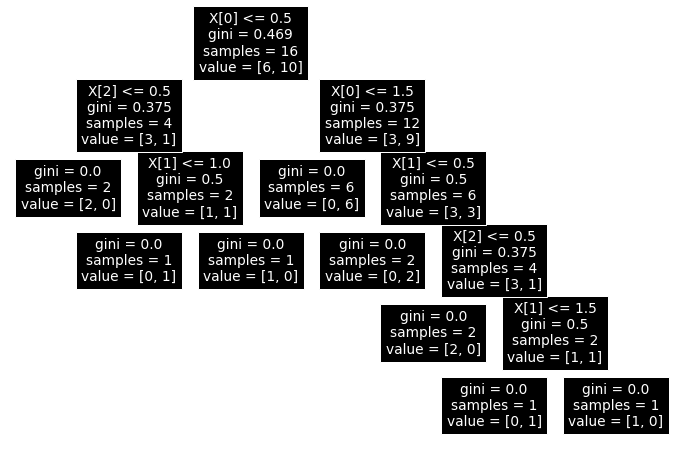

In [40]:
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(X.values, y.values))  

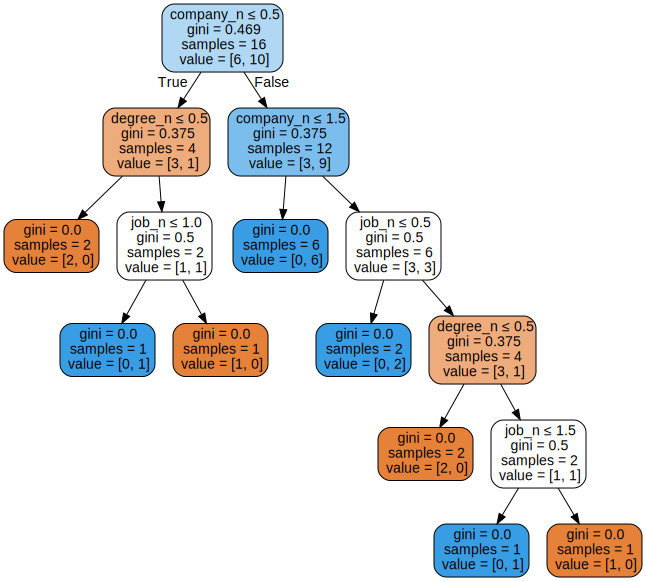

In [42]:
import graphviz
t = tree.export_graphviz(model, feature_names=X.columns, filled=True,
rounded=True, special_characters=True)

graph = graphviz.Source(t)
graph